In [1]:
# import necesary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set data visualizations 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 8) 

In [3]:
# load the data file 

dataframe = pd.read_csv('datasets/winequality-red.csv', sep=';')

In [4]:
# overview of data

print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())
print(dataframe.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
# map quality(target) into binary

dataframe['quality_label'] = dataframe['quality'].map(lambda x: 1 if x >= 6 else 0)

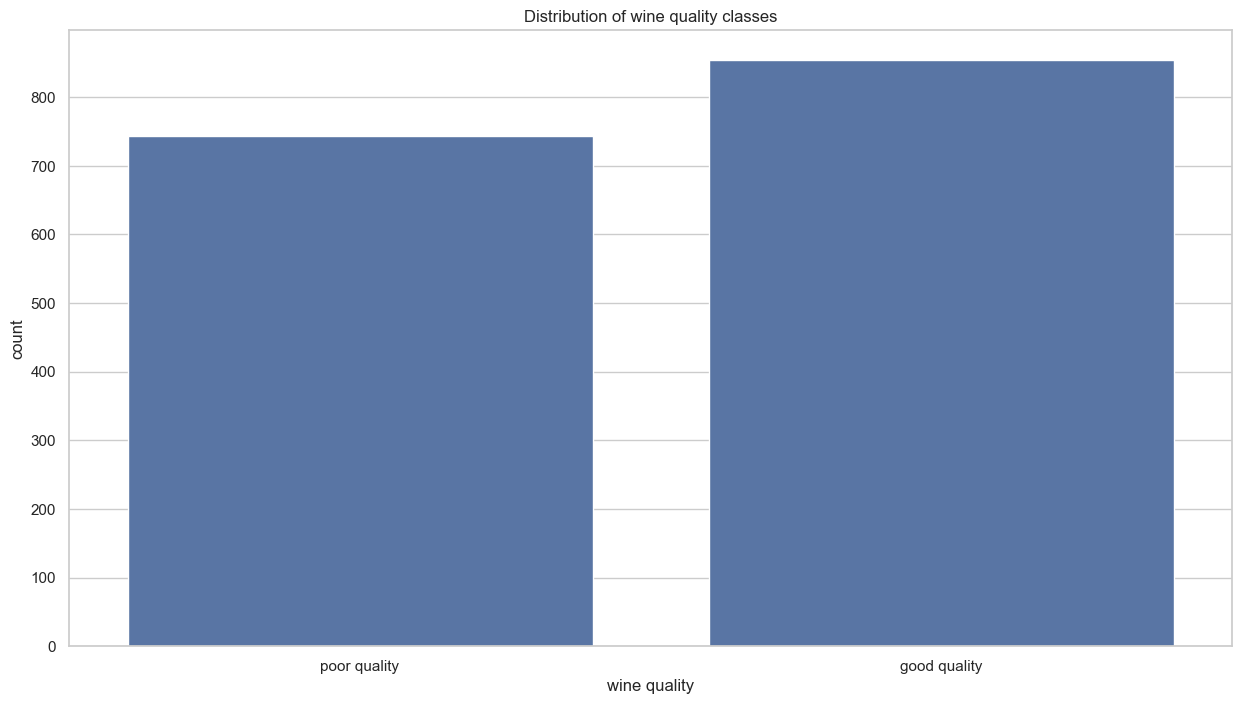

In [6]:
# countplot of survival classes

sns.countplot(x='quality_label', data=dataframe)
plt.xticks([0, 1], ["poor quality", "good quality"])
plt.xlabel('wine quality')
plt.title('Distribution of wine quality classes')
plt.show()

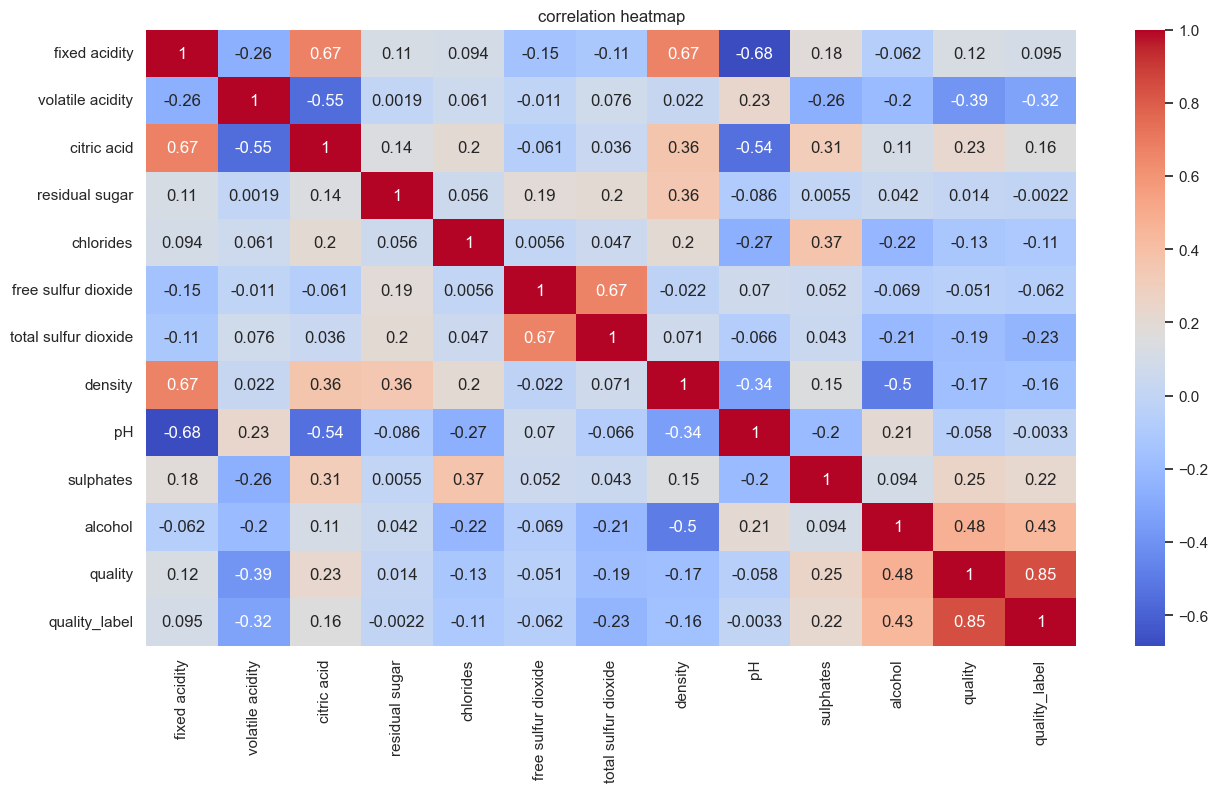

In [7]:
# correlation heatmap

sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show(block=False)


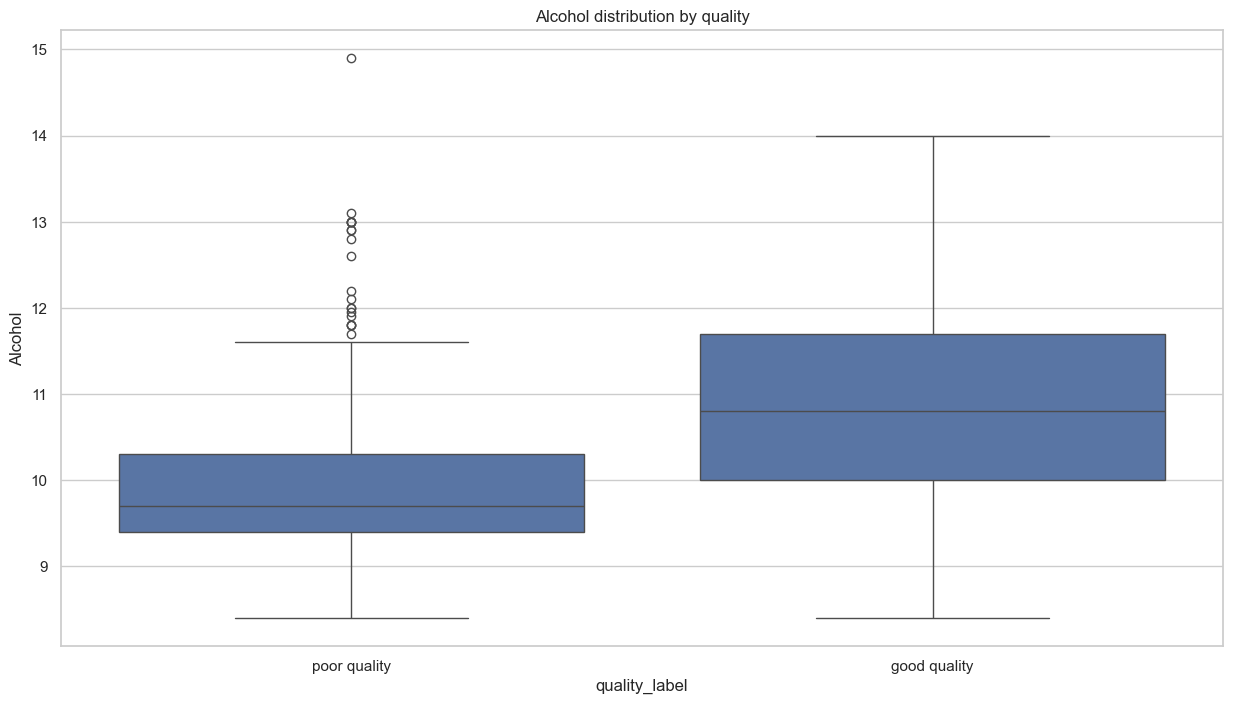

In [8]:
# boxplot showing alcohol vs wine quality

sns.boxplot(x='quality_label', y='alcohol', data=dataframe)
plt.title('Alcohol distribution by quality')
plt.xticks([0, 1], ['poor quality', 'good quality'])
plt.ylabel('Alcohol')
plt.show()

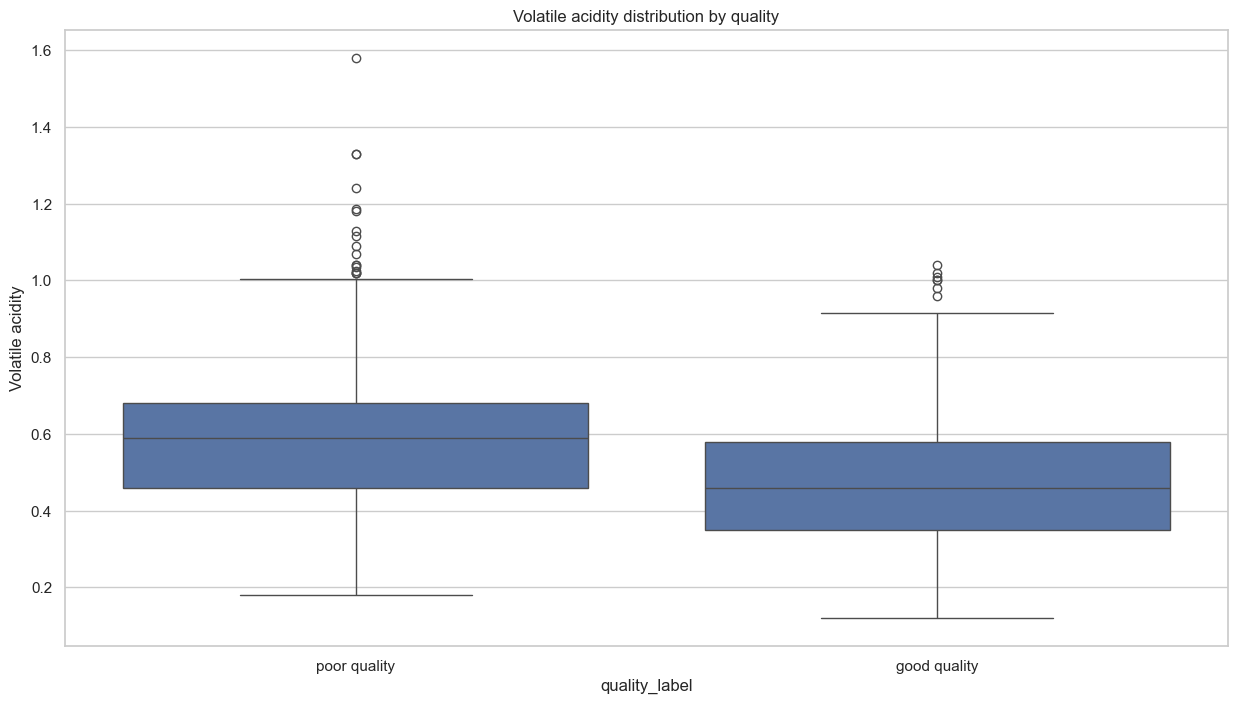

In [9]:
# boxplot showing volatile acidity vs wine quality

sns.boxplot(x='quality_label', y='volatile acidity', data=dataframe)
plt.title('Volatile acidity distribution by quality')
plt.xticks([0, 1], ['poor quality', 'good quality'])
plt.ylabel('Volatile acidity')
plt.show()

In [10]:
# seperate the feature and target variables

X = dataframe.drop(columns=['quality', 'quality_label'], axis=1)
y = dataframe["quality_label"]

In [11]:
# scale feature variables using standard scaler

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [12]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

In [20]:
# train classifier using entropy

from sklearn.tree import DecisionTreeClassifier

model_clf = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                max_depth=6, min_samples_leaf=2)
model_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=100)

In [21]:
# make precitions using the test set 

y_pred = model_clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [22]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78125
Confusion Matrix:
 [[114  34]
 [ 36 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       148
           1       0.80      0.79      0.80       172

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



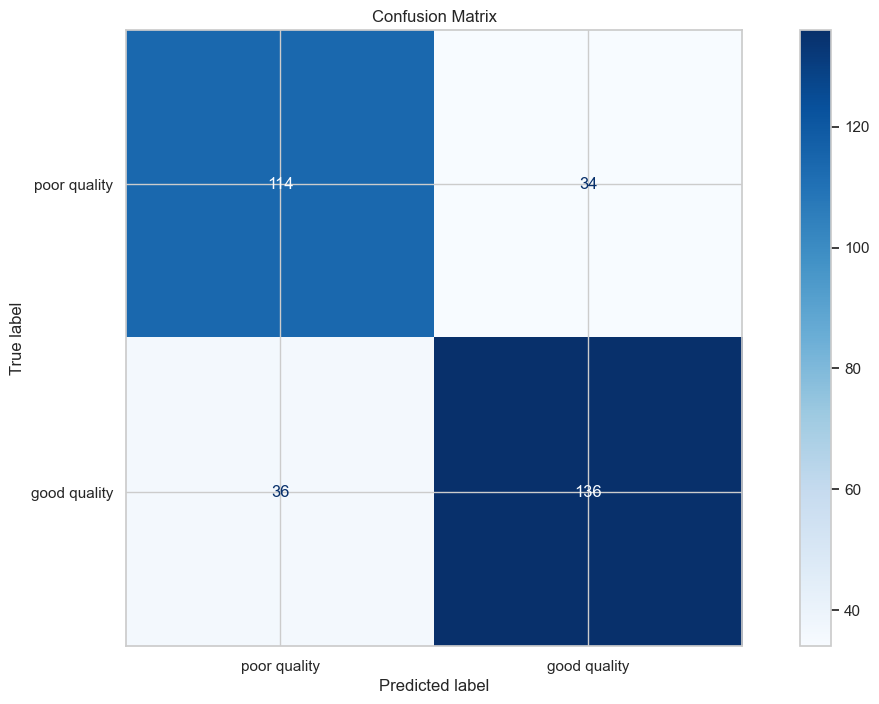

In [23]:
# confusion matrix heatmap

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["poor quality", "good quality"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

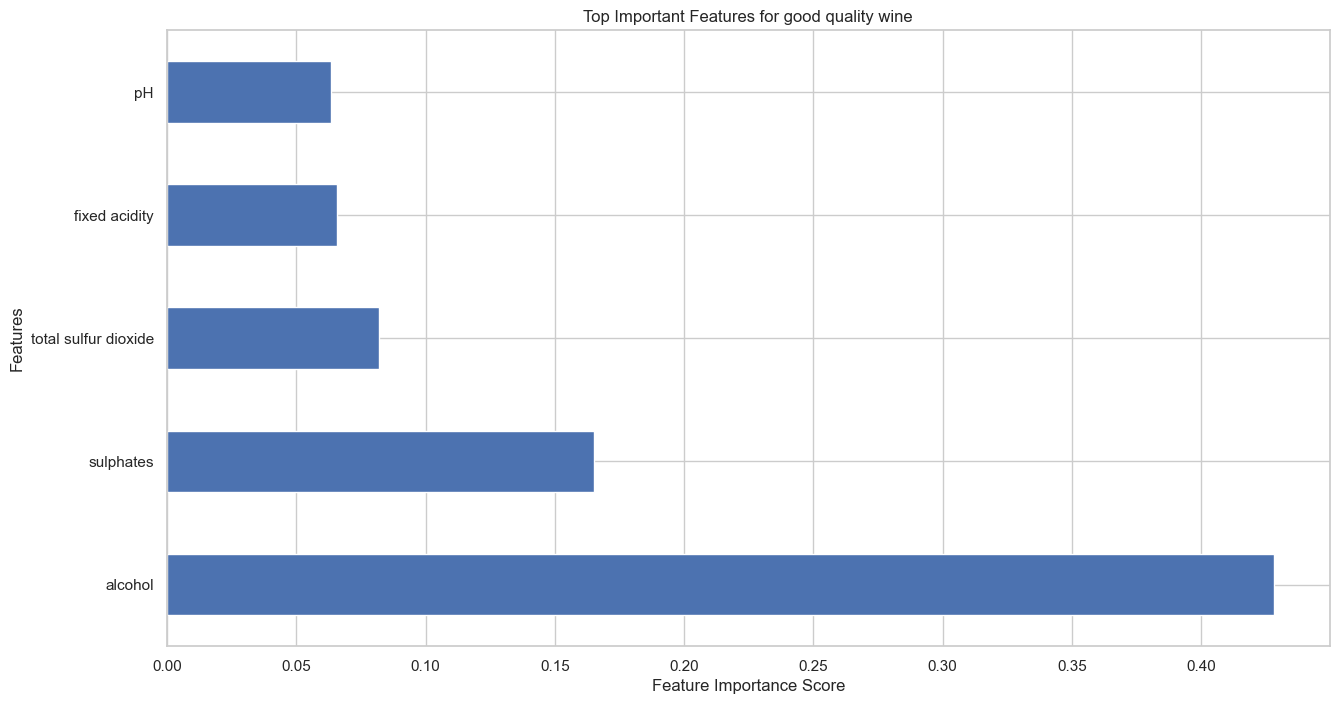

In [26]:
# plot feature importance

feature_importance= pd.Series(model_clf.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("Top Important Features for good quality wine")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

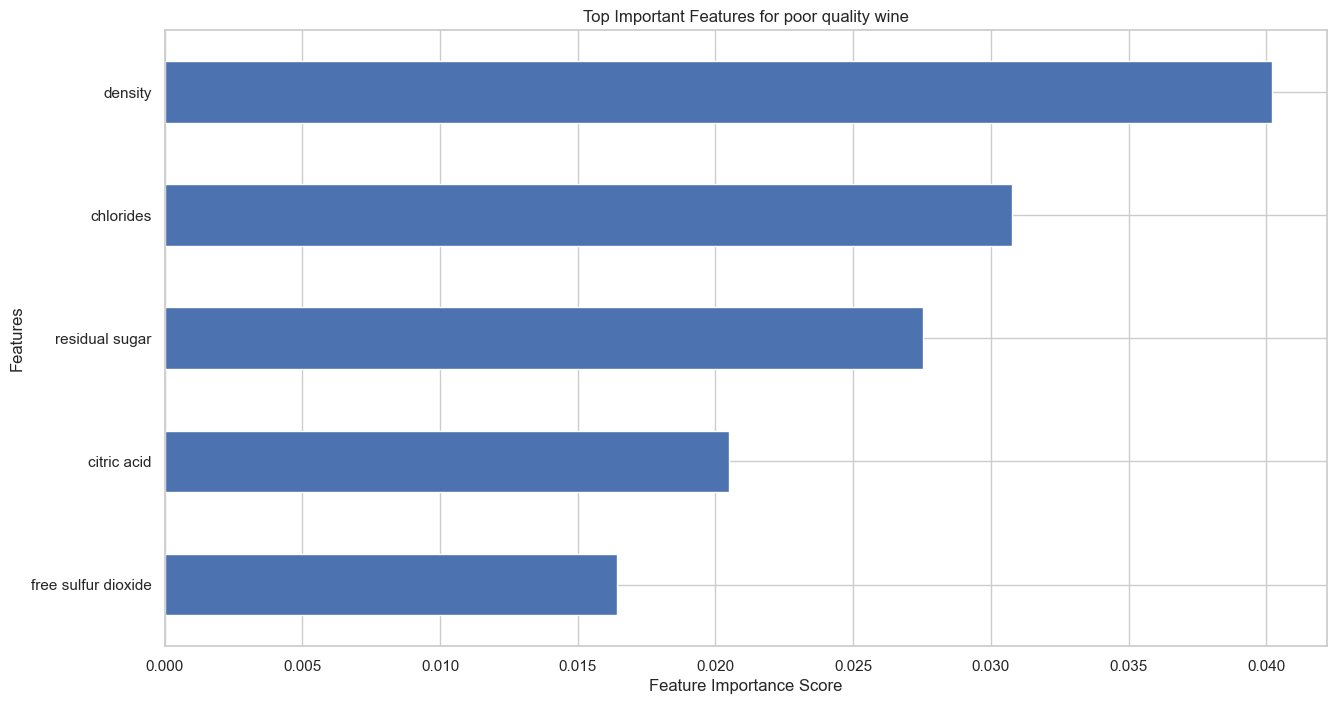

In [27]:
# plot feature importance

feature_importance= pd.Series(model_clf.feature_importances_, index=X.columns)
feature_importance.nsmallest(5).plot(kind='barh')
plt.title("Top Important Features for poor quality wine")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

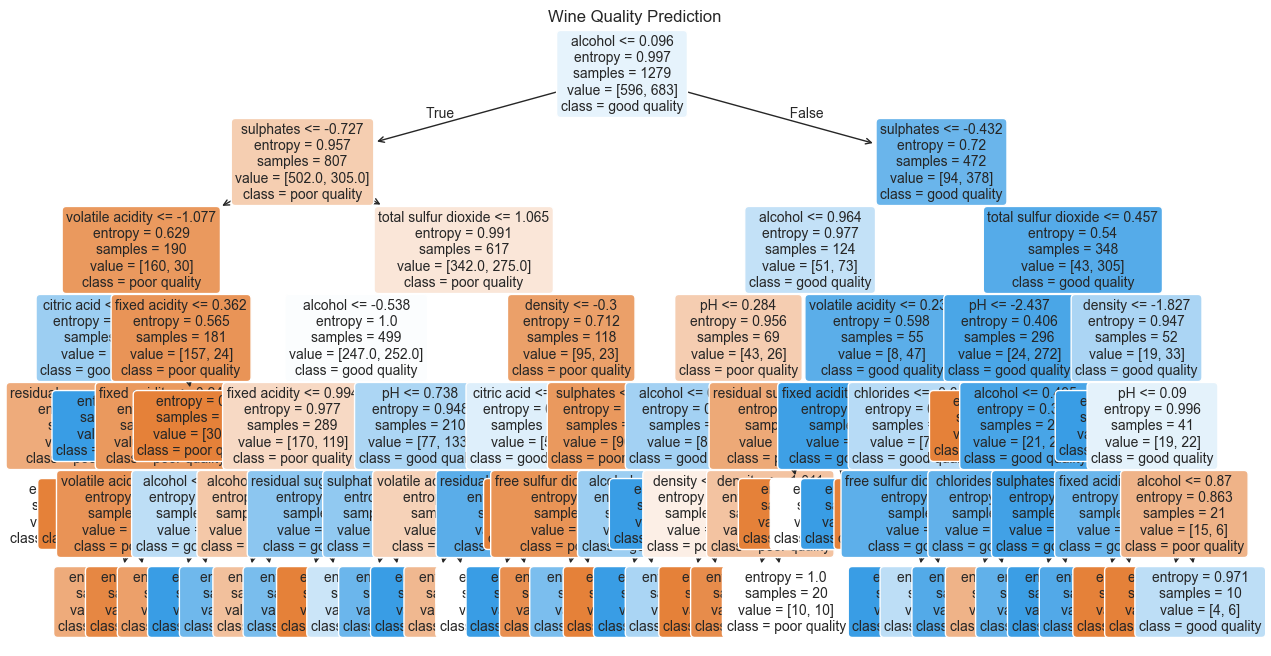

In [30]:
# plot decision tree

from sklearn.tree import plot_tree

plot_tree(model_clf, feature_names=X.columns, class_names=["poor quality", "good quality"], filled=True, rounded=True, fontsize=10)
plt.title("Wine Quality Prediction")
plt.show()